In [354]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [355]:
df =pd.read_csv(r"C:\Users\sroff\Documents\MMAI CURRICULUM\MBAN 6110 Data Sc 1\Assignment 2\experiment_dataset.csv")

In [356]:
df.info() #to check for null entries
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,3,3,3,NaN,NaN
top,NaN,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,NaN,343,346,340,NaN,NaN
mean,499.500000,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,288.819436,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,0.000000,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,249.750000,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,499.500000,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,749.250000,53.000000,NaN,NaN,NaN,26.255950,0.124238


In [357]:
df.drop_duplicates(inplace=True) # checking for duplicates
df.info() #No duplicates found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [358]:
df.groupby('Variant').count() # Counting the number of records for each variant

,Unnamed: 0,Age,Location,Device,Time Spent,CTR
Variant,,,,,,
Control,340,340,340,340,340,340
Variant A,330,330,330,330,330,330
Variant B,330,330,330,330,330,330


In [359]:
df_v= df.groupby('Variant') # Grouping Based on Variant
df_v['CTR'].mean()

Variant
Control      0.098554
Variant A    0.120269
Variant B    0.108933
Name: CTR, dtype: float64

In [360]:
df_v['Time Spent'].mean()

Variant
Control      20.070781
Variant A    24.805547
Variant B    23.343783
Name: Time Spent, dtype: float64

<Axes: xlabel='Variant', ylabel='CTR'>

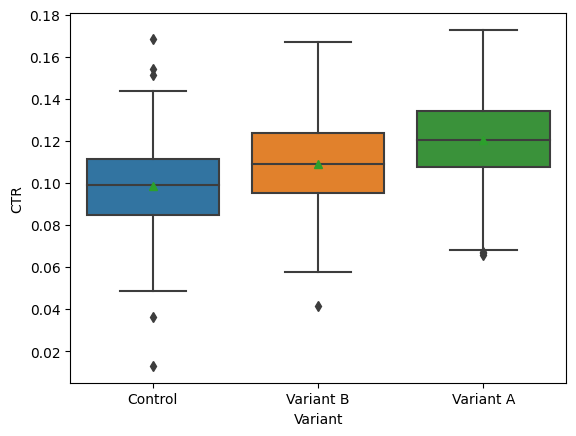

In [361]:
sns.boxplot(x='Variant',y='CTR',data=df,showmeans=True)

<Axes: xlabel='Variant', ylabel='Time Spent'>

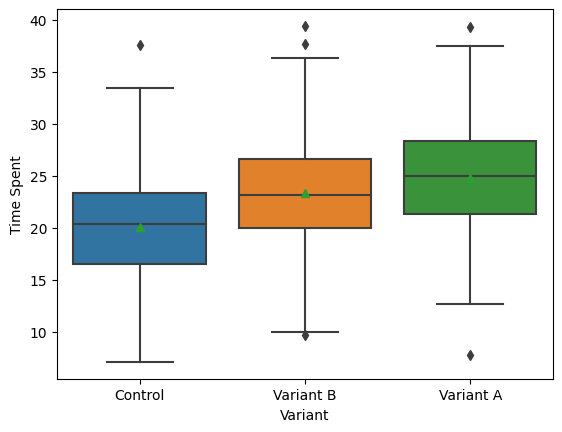

In [362]:
sns.boxplot(x='Variant',y='Time Spent',data=df,showmeans=True)

Question 1 : Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

- It seems that feature in Variant A results in a higher CTR and Time Spent based on the Average values. However, to properly analyze the results and determine which feature (if any) results in a CTR or Average Time Spent lift, we will first define the Null Hypothesis that : There is no difference in CTR or Average Time Spent between the two features; and then conduct statistical testing


In [363]:
Variant_A = df[df['Variant'] == 'Variant A']['CTR']
Variant_B = df[df['Variant'] == 'Variant B']['CTR']


t_stat, p_val = stats.ttest_ind(Variant_A, Variant_B) #t-test for CTR

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 7.08499696316128
P-value: 3.587180487986577e-12


In [364]:
Variant_A = df[df['Variant'] == 'Variant A']['Time Spent']
Variant_B = df[df['Variant'] == 'Variant B']['Time Spent']


t_stat, p_val = stats.ttest_ind(Variant_A, Variant_B) #t-test for Time Spent

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 3.6788175394209075
P-value: 0.0002534771014765265


Taking 0.05 as the critical p-value -
1) The very low p-value for CTR denotes that the null hypothesis is false for CTR i.e. there is a significant difference in CTR for the two variants, with the average CTR for Variant A being higher than that of Variant B.
2) The low p-value for Time Spent denotes that the null hypothesis is false for for CTR i.e. there is a significant difference in Time Spent for the two variants, with the average Time Spent for Variant A being higher than that of Variant B.

This suggests the feature in Variant A results in both CTR and Time Spent lift. However, to confirm this we will conduct a non-parametric test since the dataset in not large (n=1000 which is less that 10,000)

In [365]:

Variant_A = df[df['Variant'] == 'Variant A']['CTR']
Variant_B = df[df['Variant'] == 'Variant B']['CTR']


U_stat, p_val = stats.mannwhitneyu(Variant_A, Variant_B) #Mann Whitney U test for CTR
n1 = len(Variant_A)
n2 = len(Variant_B)
alpha = 0.05

critical_U = norm.ppf(alpha, n1, n2) # Finding the Critical U value

print(f"U-statistic: {U_stat}")
print(f"Critical U Value: {critical_U}")
print(f"P-value: {p_val}")

U-statistic: 71044.0
Critical U Value: -212.801696893986
P-value: 1.2434380758636484e-11


In [366]:
Variant_A = df[df['Variant'] == 'Variant A']['Time Spent']
Variant_B = df[df['Variant'] == 'Variant B']['Time Spent']


U_stat, p_val = stats.mannwhitneyu(Variant_A, Variant_B) #Mann Whitney U test for Time Spent

n1 = len(Variant_A)
n2 = len(Variant_B)
alpha = 0.05

critical_U = norm.ppf(alpha, n1, n2) #Finding the Critical U value

print(f"U-statistic: {U_stat}")
print(f"Critical U Value: {critical_U}")
print(f"P-value: {p_val}")

U-statistic: 63471.0
Critical U Value: -212.801696893986
P-value: 0.00023046799187051298


Considering the given results, we can conclude that there is a statistically significant difference in both CTR and Time Spent between Variant A and Variant B, as indicated by the very small p-values (<0.05). This reconfirms the t-tests and we can say that the feature in Variant A results in both CTR and Time Spent lift.

Question 2: Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

- To analyse the significance difference between the features and control group, we will first define the Null Hypothesis that : There is no difference in CTR or Average Time Spent between the features and the control group. Next, we conduct statistical testing using the following test methods
1) Chi-Squared Test
2) ANOVA Test
3) Kruskal-Wallis test

In [367]:
# Chi-Sqaured Test for CTR
# Convert 'CTR' to a categorical variable
df['CTR_CAT'] = pd.cut(df['CTR'], bins=[0, 0.05, 0.1, 0.15,0.2])

# Create a contingency table
contingency_table = pd.crosstab(df['Variant'], df['CTR_CAT'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")

Chi-squared: 118.72665767798219
P-value: 3.0162643329434613e-23


In [368]:
# Chi-Sqaured Test for Time Spent
# Convert 'Time Spent to a categorical variable
df['Time_Spent_CAT'] = pd.cut(df['Time Spent'], bins=[0, 10, 20, 30,40])

# Create a contingency table
contingency_table = pd.crosstab(df['Variant'], df['Time_Spent_CAT'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")

Chi-squared: 94.26037538644832
P-value: 3.941051460863924e-18


The extremely low p-values for both CTR and Time Spent suggests significant difference between the features and the control group.

In [369]:
# ANOVA Test for Variants based on CTR mean
Control = df[df['Variant'] == 'Control']['CTR']
Var_A = df[df['Variant'] == 'Variant A']['CTR']
Var_B = df[df['Variant'] == 'Variant B']['CTR']

f_stat, p_val = stats.f_oneway(Control, Var_A, Var_B)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 93.588915936227
P-value: 5.638952705781955e-38


In [370]:
# ANOVA Test for Variants based on Time Spent mean
Control = df[df['Variant'] == 'Control']['Time Spent']
Var_A = df[df['Variant'] == 'Variant A']['Time Spent']
Var_B = df[df['Variant'] == 'Variant B']['Time Spent']

f_stat, p_val = stats.f_oneway(Control, Var_A, Var_B)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 75.60840947416146
P-value: 2.676826588910432e-31


Once again, the extremely low p-values for both CTR and Time Spent suggests significant difference between the features and the control group.

In [371]:
# Kruskal-Wallis Test for CTR
Control = df[df['Variant'] == 'Control']['CTR']
Var_A = df[df['Variant'] == 'Variant A']['CTR']
Var_B = df[df['Variant'] == 'Variant B']['CTR']

H, pval = stats.kruskal(Control, Var_A, Var_B)

print('H statistic:', H)
print('The p-value of the test:', pval)

H statistic: 162.2144623750578
The p-value of the test: 5.964541337211197e-36


In [372]:
# Kruskal-Wallis Test for Time Spent
Control = df[df['Variant'] == 'Control']['Time Spent']
Var_A = df[df['Variant'] == 'Variant A']['Time Spent']
Var_B = df[df['Variant'] == 'Variant B']['Time Spent']

H, pval = stats.kruskal(Control, Var_A, Var_B)

print('H statistic:', H)
print('The p-value of the test:', pval)

H statistic: 128.94233881092123
The p-value of the test: 1.0012139345955057e-28


To reconfirm the alternative hypothesis, the extremely low p-values for both CTR and Time Spent suggests significant difference between the features and the control group. Moreover, the H-Statistic Value for both CTR and Time Spent is greater than their corresponding Chi-Squared Values meaning that we can reject the Null Hypothesis.

Therefore, we are inclined to believe that changes in the key features introduced in Variant A and Variant B will improve the performance metrics resulting in higher engagement of users.

For making reccomendations, let us analyse the data based on other variables.

For the continuous variables (Age) we can use histograms to understand spread. 

0.0017494738491233058
-1.2187764363137228


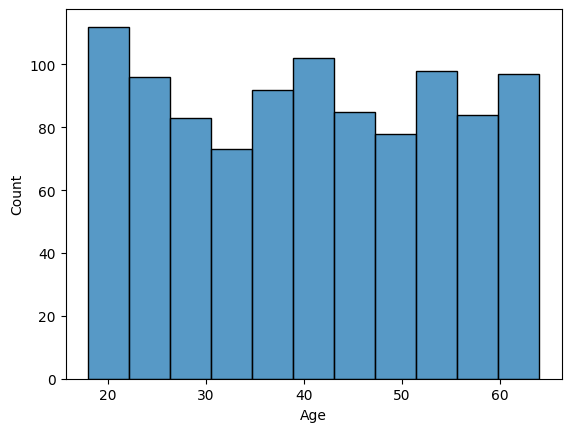

In [373]:
sns.histplot(df['Age'])
print(stats.skew(df['Age']))
print(stats.kurtosis(df['Age']))

The Age distribution seems fairly normal, with most common age being around 20. The skew for Age is 0.0017 which is fairly close to 0 and supports what we see (normal distribution). The kurtosis of Age is -1.22, which indicates Platykurtic distribution (thin tails), or less volatility. It indicates that the data is less peaked and has less extreme values than a normal distribution.

To analyse if Age has any correlation with the CTR or Time Spent, we will conduct a Pearson's correlation test between Age and the other continous variables which respresent the performance metrics.

In [374]:
pearson_corr, p_val = stats.pearsonr(df['Age'], df['CTR'])

print(f"Pearson's correlation Coefficient: {pearson_corr}")
print(f"P-value: {p_val}")

Pearson's correlation Coefficient: -0.001080258334033944
P-value: 0.9727830131432246


In [375]:
pearson_corr, p_val = stats.pearsonr(df['Age'], df['Time Spent'])

print(f"Pearson's correlation Coefficient: {pearson_corr}")
print(f"P-value: {p_val}")

Pearson's correlation Coefficient: 0.001970058767060921
P-value: 0.9503869424928707


Since, the Pearson's Correlation coefficients for both the comparisons are very close to 0, we can say that there is no significant relationship between Age and CTR/Time Spent. This means that the Age does not affect the CTR and Time Spent values of records.

For categorical variables (Location, Device), we will use ANOVA tests to determine if there is a difference in the means of the performence metrics i.e. CTR and Time Spent when grouped by Location and Device type. This will allow us to decide whether the CTR and Time Spent are affected by the Location or Device type. So we will first define the Null Hypothesis that : There is no difference in CTR and Average Time Spent between the different Location and Device types.

In [376]:
# ANOVA Test for Location based on CTR
Location1 = df[df['Location'] == 'Location1']['CTR']
Location2 = df[df['Location'] == 'Location2']['CTR']
Location3 = df[df['Location'] == 'Location3']['CTR']

f_stat, p_val = stats.f_oneway(Location1, Location2, Location3)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 0.5792245145655729
P-value: 0.5605211716238133


In [377]:
# ANOVA Test for Location based on Time Spent
Location1 = df[df['Location'] == 'Location1']['Time Spent']
Location2 = df[df['Location'] == 'Location2']['Time Spent']
Location3 = df[df['Location'] == 'Location3']['Time Spent']

f_stat, p_val = stats.f_oneway(Location1, Location2, Location3)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 0.053578839670573676
P-value: 0.9478339402848069


In [378]:
# ANOVA Test for Devices based on CTR
Device1 = df[df['Device'] == 'Device1']['CTR']
Device2 = df[df['Device'] == 'Device2']['CTR']
Device3 = df[df['Device'] == 'Device3']['CTR']

f_stat, p_val = stats.f_oneway(Device1, Device2, Device3)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 0.7105872492654717
P-value: 0.4916042399968955


In [379]:
# ANOVA Test for Devices based on Time Spent
Device1 = df[df['Device'] == 'Device1']['Time Spent']
Device2 = df[df['Device'] == 'Device2']['Time Spent']
Device3 = df[df['Device'] == 'Device3']['Time Spent']

f_stat, p_val = stats.f_oneway(Device1, Device2, Device3)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 0.26645371811833884
P-value: 0.7661459958744103


It can be seen that the p-values for all the ANOVA tests are quite large and greater than the critical value of 0.05. This means that the Null hypothesis is true - meaning that the CTR and Time Spent data is not affected by the different Device Type and Locations.


Question 3 : Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

Answer - Summary of results :

1) Based on the statistical testing conducted using Chi-Squared, ANOVA, and Kruskal-Wallis tests, the results consistently indicate a significant difference between the features and the control group in terms of both CTR and Average Time Spent.
2) Based on the analysis using T-test and Mann-Whitney U test, it appears that both CTR and Time Spent are higher for Variant A compared to Variant B. The p-values for both metrics are very low, indicating a significant difference between the two variants.
3) Based on Pearson's correlation test between Age and CTR & Time Spent, there is no significant relationship between Age and CTR & Time Spent. This means that the Age does not affect the CTR and Time Spent values of records.
4) Based on ANOVA tests to determine between Location & Device Type and the performence metrics i.e. CTR & Time Spent, we see that CTR & Time Spent are not affected by different Device Types and Locations.

Recommendations to the engineering team -
 1) I recommend deploying either of the features from Variant A or Variant B, as both have shown a statistically significant improvement in CTR and Average Time Spent compared to the control group.
 2) However, if we were are restricted to deploying just one feature,  I would recommend deploying the feature from Variant A. This variant has shown higher engagement metrics in terms of CTR and Time Spent, suggesting that users are more likely to interact with and spend more time on the key feature implemented in Variant A.

Question 4: Create a roll-out plan. How quickly will you introduce the feature to your audience?

Answer -  

1) Roll-out Approach:

I suggest a simultaneous roll-out of both Variant A and Variant B to small segments of the user base and then closely monitoring the performance. This will allow for a direct comparison of the two variants in the real-world conditions and provide valuable insights into the relative effectiveness of each variant.

2) Roll-out Plan:

A) Initital Roll-out: Instead of introducing the features to the entire user base,I suggest releasing the features to a small portion of the user base, such as a specific geographic region or a random subset of users. This will allow for a close monitoring of the performance metrics, user feedback, and any potential issues that may arise. Then we can evaluate the impact of the feature on key metrics such as CTR and Time Spent. This period can vary depending on the size of the user base and the time required to gather sufficient data.

B) Improvements: Based on the feedback and data collected during the initial roll-out, we can make improvements to the features by addressing the identified issues and enhancing the performance based on user feedback and data gathered.

C) Full Roll-out: Once we are confident in the effectiveness and stability of the features, we can expand the roll-out to the larger user base. This can be done in phases or by gradually increasing the percentage of users who have access to the feature. Even after the full roll-out, we will need to monitor the performance of the features and collect user feedback. We will need to leverage this information to make further improvements to enhance the user experience and maximize the user engagement.